In [1]:
import pandas as pd

# Read the data set in as df

In [2]:
# read in sample.csv into a dataframe with \t delimiter
df = pd.read_csv('sample.csv', sep='\t')
print("Dataset shape: ", df.shape)
df.head()

Dataset shape:  (403212, 27)


,detecttime,hash,status,region,reorg,replace,curblocknumber,failurereason,blockspending,timepending,...,network,type,maxpriorityfeepergas,maxfeepergas,basefeepergas,dropreason,rejectionreason,stuck,gasused,detect_date
0,2023-02-24T00:00:00.167Z,0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...,pending,us-east-1,NaN,NaN,16694512,none,NaN,NaN,...,main,2,3.000000e+09,4.702304e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24
1,2023-02-24T00:00:00.253Z,0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...,pending,eu-central-1,NaN,NaN,16694512,none,NaN,NaN,...,main,2,3.000000e+09,4.702304e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24
2,2023-02-24T00:00:00.280Z,0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...,pending,ap-southeast-1,NaN,NaN,16694512,none,NaN,NaN,...,main,2,3.000000e+09,4.702304e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24
3,2023-02-24T00:00:00.374Z,0x44bfc98df9a35e3cd4f144bba9e89afdb12122747dda...,pending,eu-central-1,NaN,NaN,16694512,none,NaN,NaN,...,main,2,1.000000e+09,4.604646e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24
4,2023-02-24T00:00:00.383Z,0x44bfc98df9a35e3cd4f144bba9e89afdb12122747dda...,pending,us-east-1,NaN,NaN,16694512,none,NaN,NaN,...,main,2,1.000000e+09,4.604646e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24


# Get a subset of type 2 tx -> store as df_type2

In [3]:
# get all type 2 transactions
df_type2 = df.loc[df['type'] == 2]
df_type2.head()

,detecttime,hash,status,region,reorg,replace,curblocknumber,failurereason,blockspending,timepending,...,network,type,maxpriorityfeepergas,maxfeepergas,basefeepergas,dropreason,rejectionreason,stuck,gasused,detect_date
0,2023-02-24T00:00:00.167Z,0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...,pending,us-east-1,NaN,NaN,16694512,none,NaN,NaN,...,main,2,3.000000e+09,4.702304e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24
1,2023-02-24T00:00:00.253Z,0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...,pending,eu-central-1,NaN,NaN,16694512,none,NaN,NaN,...,main,2,3.000000e+09,4.702304e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24
2,2023-02-24T00:00:00.280Z,0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...,pending,ap-southeast-1,NaN,NaN,16694512,none,NaN,NaN,...,main,2,3.000000e+09,4.702304e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24
3,2023-02-24T00:00:00.374Z,0x44bfc98df9a35e3cd4f144bba9e89afdb12122747dda...,pending,eu-central-1,NaN,NaN,16694512,none,NaN,NaN,...,main,2,1.000000e+09,4.604646e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24
4,2023-02-24T00:00:00.383Z,0x44bfc98df9a35e3cd4f144bba9e89afdb12122747dda...,pending,us-east-1,NaN,NaN,16694512,none,NaN,NaN,...,main,2,1.000000e+09,4.604646e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24


## Notice the gasprice in type 2 tx is NaN

In [5]:
# print gaprice for head of type 2 transactions
print(df_type2['gasprice'].head())

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: gasprice, dtype: float64


## Calculate the gasprice for type 2 tx using the formula:
### gasprice = min[ maxfeepergas, (basefeepergas + min[ (maxfeepergas - basefeepergas), maxpriorityfeepergas) ] ]

Copy the original df to df2 (for later comparison) and merge the calculated gasprice into df2

In [6]:
# Calculate gas price for type 2 transactions
# gasprice = min[ maxfeepergas, (basefeepergas + min[ (maxfeepergas - basefeepergas), maxpriorityfeepergas) ] ]

# maxfeepergas - basefeepergas
df_type2['diff_mfpg_bfpg'] = df_type2['maxfeepergas'] - df_type2['basefeepergas']

# min[ (maxfeepergas - basefeepergas), maxpriorityfeepergas) ]
df_type2['min_diff_mpfpg'] = df_type2[['diff_mfpg_bfpg', 'maxpriorityfeepergas']].min(axis=1)

# basefeepergas + min[ (maxfeepergas - basefeepergas), maxpriorityfeepergas) ]
df_type2['bfpg_plus_min_diff_mpfpg'] = df_type2['basefeepergas'] + df_type2['min_diff_mpfpg']

# min[ maxfeepergas, (basefeepergas + maxpriorityfeepergas) ]
df_type2['min_mfpg_bfpg_plus_min_diff_mpfpg'] = df_type2[['maxfeepergas', 'bfpg_plus_min_diff_mpfpg']].min(axis=1)

# copy df to df2 
df2 = df.copy()

# if type == 2, set the gasprice to the calculated gasprice value (min_mfpg_bfpg_plus_min_diff_mpfpg)
df2.loc[df2['type'] == 2, 'gasprice'] = df_type2['min_mfpg_bfpg_plus_min_diff_mpfpg']

/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_27080/1335439831.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_type2['diff_mfpg_bfpg'] = df_type2['maxfeepergas'] - df_type2['basefeepergas']
/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_27080/1335439831.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_type2['min_diff_mpfpg'] = df_type2[['diff_mfpg_bfpg', 'maxpriorityfeepergas']].min(axis=1)
/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_27080/1335439831.py:1

### Do some sanity checks

In [54]:
# Santity check that the min is indeed the min
# print the columns for diff_mfpg_bfpg maxpriorityfeepergas min_diff_mpfpg
df_type2[['diff_mfpg_bfpg', 'maxpriorityfeepergas', 'min_diff_mpfpg']].head()

,diff_mfpg_bfpg,maxpriorityfeepergas,min_diff_mpfpg
0,1.890076e+10,3.000000e+09,3.000000e+09
1,1.890076e+10,3.000000e+09,3.000000e+09
2,1.890076e+10,3.000000e+09,3.000000e+09
3,1.792418e+10,1.000000e+09,1.000000e+09
4,1.792418e+10,1.000000e+09,1.000000e+09


In [8]:
# Sanity check that the gasprice is nan in many df (original df) rows but no longer null after calculation and merge (into df2)
print("Number of nan values for gas price in df:  ", df['gasprice'].isnull().sum())
print("Number of nan values for gas price in df2: ", df2['gasprice'].isnull().sum())

Number of nan values for gas price in df:   351459
Number of nan values for gas price in df2:  0


In [14]:
# compare the original (df) gasprice head to the gasprice head after calculation (df2)
print("Original gasprice head: ")
print(df['gasprice'].head())

print("\nGasprice head after calculation: ")
print(df2['gasprice'].head())

Original gasprice head: 
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: gasprice, dtype: float64

Gasprice head after calculation: 
0    3.112228e+10
1    3.112228e+10
2    3.112228e+10
3    2.912228e+10
4    2.912228e+10
Name: gasprice, dtype: float64


In [51]:
# Count of non-null gasprice in df 
print(df['gasprice'].count())
print(df['gasprice'].count() / df.shape[0])
print(df2['gasprice'].count())

51753
0.1283518347668224
403212


## Make some plot 

In [56]:
import matplotlib.pyplot as plt

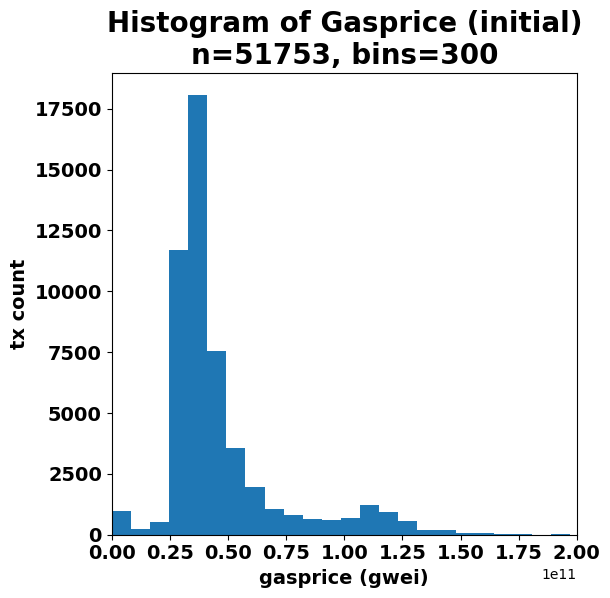

In [52]:
# Create a histogram of gasprice in df (pre calculation merge) 

plt.figure(figsize=(6,6))
plt.hist(df['gasprice'], bins=300)
plt.title("Histogram of Gasprice (initial)\nn=51753, bins=300", fontsize=20, fontweight='bold')
xlim = plt.xlim(0, .2e12)
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.ylabel("tx count", fontsize=14, fontweight='bold')
plt.xlabel("gasprice (gwei)", fontsize=14, fontweight='bold')
plt.show()

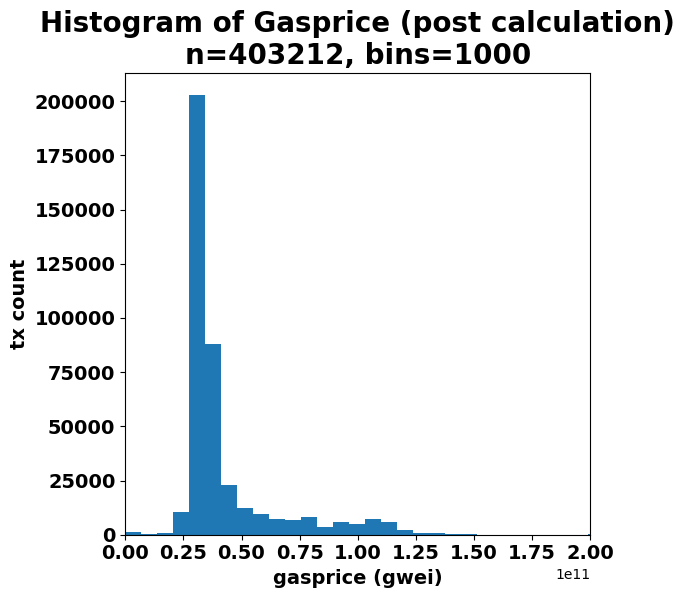

In [53]:
# Create a histogram of gasprice in df2 (post calculation merge) 

plt.figure(figsize=(6,6))
plt.hist(df2['gasprice'], bins=1000)
plt.title("Histogram of Gasprice (post calculation)\nn=403212, bins=1000", fontsize=20, fontweight='bold')
xlim = plt.xlim(0, .2e12)
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.ylabel("tx count", fontsize=14, fontweight='bold')
plt.xlabel("gasprice (gwei)", fontsize=14, fontweight='bold')
plt.show()